In [ ]:
#
# Scalling Analysis for the Flat Scan Sampling multi core
# João Inácio, Apr. 16th, 2021
# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress

In [14]:
# System and simulation information

dim = "2D"
lattice = "SS"
NN = 4

L = 16
N_atm = 1 * L**2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1

REP = 10**5
skip = N_atm
shuffle = 10**0

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3

new_n_cores = np.array([2, 8, 16, 32, 64, 128]) - 1
old_n_cores = np.array([1, 8 ,16, 32, 64, 128])


In [20]:
# Initialization of data arrays

new_wall_time = np.zeros(len(new_n_cores))
new_q_time_E = np.zeros(len(new_n_cores))

old_wall_time = np.zeros(len(old_n_cores))
old_q_time_E = np.zeros(len(old_n_cores))


In [21]:
# Get the data from the new implementation

k = 0
for n in new_n_cores:
    if n == 1:
        file_name = "".join(("./data_cluster/new_version/", str(int(n)), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
        n = 0
    else:
    
        file_name = "".join(("./data_cluster/new_version/", str(int(n + 1)), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip), "_shuffle_", str(int(np.log10(shuffle)))))

    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")

        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        new_wall_time[k] = float(data_file.readline().strip("\n"))
        new_q_time_E[k] = np.sum(q_time_E)

    print(n + 1)
    print("Mean Wall time: {:.5f} seconds".format(new_wall_time[k]))
    print("Mean q_time / E: {:.5f} seconds".format(new_q_time_E[k]))
    print("------------------------------------")

    k += 1


1
Mean Wall time: 299461.00000 seconds
Mean q_time / E: 2477.40481 seconds
------------------------------------
8
Mean Wall time: 58205.80000 seconds
Mean q_time / E: 468.95802 seconds
------------------------------------
16
Mean Wall time: 33029.70000 seconds
Mean q_time / E: 260.06944 seconds
------------------------------------
32
Mean Wall time: 20845.90000 seconds
Mean q_time / E: 161.58253 seconds
------------------------------------
64
Mean Wall time: 14415.80000 seconds
Mean q_time / E: 107.84125 seconds
------------------------------------
128
Mean Wall time: 10696.20000 seconds
Mean q_time / E: 78.33585 seconds
------------------------------------


In [22]:
# Get the data from the old implementation

k = 0
for n in old_n_cores:
    if n == 1:
        file_name = "".join(("./data_cluster/old_version/", str(int(n)), "_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
    else:
    
        file_name = "".join(("./data_cluster/old_version/", str(int(n)), "_shuffle_JDOS_FSS_Ising_", 
                             dim, "_", lattice, "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))

    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")

        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        old_wall_time[k] = float(data_file.readline().strip("\n"))
        old_q_time_E[k] = np.sum(q_time_E)

    print(n)
    print("Mean Wall time: {:.5f} seconds".format(old_wall_time[k]))
    print("Mean q_time / E: {:.5f} seconds".format(old_q_time_E[k]))
    print("------------------------------------")

    k += 1

1
Mean Wall time: 299461.00000 seconds
Mean q_time / E: 2477.40481 seconds
------------------------------------
8
Mean Wall time: 31418.80000 seconds
Mean q_time / E: 253.44502 seconds
------------------------------------
16
Mean Wall time: 18306.20000 seconds
Mean q_time / E: 147.34596 seconds
------------------------------------
32
Mean Wall time: 12147.70000 seconds
Mean q_time / E: 94.62750 seconds
------------------------------------
64
Mean Wall time: 8586.49000 seconds
Mean q_time / E: 65.68927 seconds
------------------------------------
128
Mean Wall time: 6133.18000 seconds
Mean q_time / E: 45.60513 seconds
------------------------------------


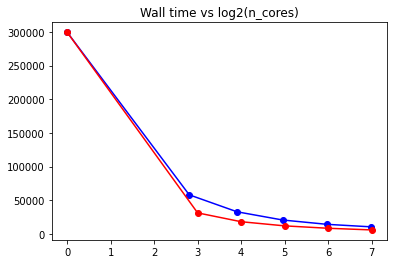

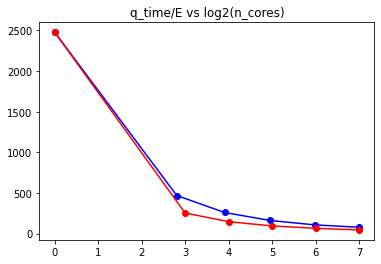

In [23]:
# Plot Wall time and q_time/E

# Wall time
plt.figure(1)
plt.plot(np.log2(new_n_cores), new_wall_time, '-ob')
plt.plot(np.log2(old_n_cores), old_wall_time, '-or')
plt.title("Wall time vs log2(n_cores)")
    
# q_time/E
plt.figure(2)
plt.plot(np.log2(new_n_cores), new_q_time_E, '-ob')
plt.plot(np.log2(old_n_cores), old_q_time_E, '-or')
plt.title("q_time/E vs log2(n_cores)")

plt.show()


Fit with p=0.9625687159239523 and r2=0.9992584422054429
Fit with p=0.9936967980515192 and r2=0.9989909932603888


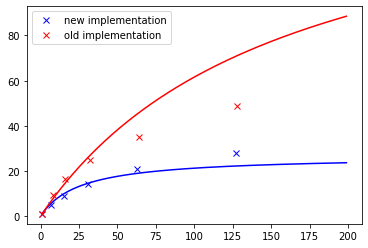

In [55]:
# Speedup

new_speedup = np.zeros(len(new_n_cores))
old_speedup = np.zeros(len(old_n_cores))

for i in range(len(new_n_cores)):
    new_speedup[i] = new_wall_time[0] / new_wall_time[i]

for i in range(len(old_n_cores)):
    old_speedup[i] = old_wall_time[0] / old_wall_time[i]

y = 1 / new_speedup
x = 1 / new_n_cores

new_p, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Fit with p={new_p} and r2={r_value**2}")

y = 1 / old_speedup
x = 1 / old_n_cores

old_p, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Fit with p={old_p} and r2={r_value**2}")


# Amdahl's Law

cores_amd = np.arange(1, 200, 1)

old_speedup_theo = 1 / (1 - old_p + (old_p / cores_amd))
new_speedup_theo = 1 / (1 - new_p + (new_p / cores_amd))

plt.figure(1)
plt.plot(new_n_cores, new_speedup, 'xb', label="new implementation")
plt.plot(cores_amd, new_speedup_theo, '-b')

plt.plot(old_n_cores, old_speedup, 'xr', label="old implementation")
plt.plot(cores_amd, old_speedup_theo, '-r')


plt.legend()
plt.show()
